## Python Mapping: Overview of Racial Makeup in Louisville, KY Using US Census Data

### Table of Contents
<ul>
    <li>Project Summary</li>
    <li>Technical Summary</li>
    <li>Features</li>
    <li>Milestones</li>
    <li>Requirements to run notebook</li>
</ul>

### Project Summary
<hr>
<p>This project involves conducting an exploratory analysis of race and ethnicity distribution within Louisville, KY by census tract</p>

<h3>Technical Summary</h3>
<hr>
<p>Several libraries are used in this project</p>

<ul>
    <li>geopandas</li>
    <li>contextily</li>
    <li>pandas</li>
    <li>matplotlib</li>
</ul>

Note: the process for installing geopandas was a extremely tedious process for me; therefore, it is recommended to install the packages through Anaconda. I highly recommend reviewing this [article](https://geoffboeing.com/2014/09/using-geopandas-windows/) before installing geopandas on your machine

### Problem Statement
<hr>
<p>What is the racial and ethnicity make-up in Louisville, Ky when reviewing by census tract on a spatial level?</p>

In [81]:
# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

In [82]:
from osgeo import gdal, ogr, osr
from fiona.ogrext import Iterator, ItemsIterator, KeysIterator
from geopandas import GeoDataFrame

In [83]:
# load the geojson data file

gdf = gpd.read_file('data/acs2019_5yr_B03002_14000US21111007501.geojson')

### Exploratory Analysis of File

In [84]:
gdf.shape
print(f"There are {gdf.shape[0]} rows and {gdf.shape[1]} columns")

There are 115 rows and 45 columns


In [85]:
# Reviewing first 5 rows
gdf.head()

geoid                               name  B03002001  \
0  14000US21111004500     Census Tract 45, Jefferson, KY     3295.0   
1  14000US21111007501  Census Tract 75.01, Jefferson, KY     5500.0   
2  14000US21111007502  Census Tract 75.02, Jefferson, KY     5663.0   
3  14000US21111007700     Census Tract 77, Jefferson, KY     3429.0   
4  14000US21111009103  Census Tract 91.03, Jefferson, KY     1563.0   

   B03002001, Error  B03002002  B03002002, Error  B03002003  B03002003, Error  \
0             248.0     3061.0             263.0     2012.0             274.0   
1             313.0     5457.0             311.0     5151.0             317.0   
2             450.0     5546.0             459.0     5096.0             488.0   
3             224.0     3312.0             224.0     2941.0             264.0   
4             196.0     1386.0             188.0      886.0             163.0   

   B03002004  B03002004, Error  ...  B03002017, Error  B03002018  \
0      948.0             186.0  ...              11.0        0.0   
1       27.0              27.0  ...              16.0        6.0   
2      358.0             254.0  ...              16.0        0.0   
3      212.0             140.0  ...              11.0        0.0   
4      197.0             146.0  ...              11.0        6.0   

   B03002018, Error  B03002019  B03002019, Error  B03002020  B03002020, Error  \
0              11.0       16.0              18.0       16.0              18.0   
1               9.0        4.0               6.0        0.0              16.0   
2              16.0       14.0              19.0        0.0              16.0   
3              11.0        0.0              11.0        0.0              11.0   
4               9.0        0.0              11.0        0.0              11.0   

   B03002021  B03002021, Error  \
0        0.0              11.0   
1        4.0               6.0   
2       14.0              19.0   
3        0.0              11.0   
4        0.0              11.0   

                                            geometry  
0  MULTIPOLYGON (((-85.80194 38.15540, -85.80164 ...  
1  MULTIPOLYGON (((-85.70476 38.28551, -85.70415 ...  
2  MULTIPOLYGON (((-85.67605 38.30039, -85.67593 ...  
3  MULTIPOLYGON (((-85.69603 38.27383, -85.69552 ...  
4  MULTIPOLYGON (((-85.76555 38.15263, -85.76551 ...  

[5 rows x 45 columns]

In [86]:
# Reviewing random rows
gdf.sample(5)

geoid                                name  B03002001  \
54   14000US21111011404  Census Tract 114.04, Jefferson, KY     3422.0   
72   14000US21111011706  Census Tract 117.06, Jefferson, KY     3671.0   
0    14000US21111004500      Census Tract 45, Jefferson, KY     3295.0   
7    14000US21111010001  Census Tract 100.01, Jefferson, KY     4535.0   
107  14000US21111012604  Census Tract 126.04, Jefferson, KY     5426.0   

     B03002001, Error  B03002002  B03002002, Error  B03002003  \
54              322.0     2357.0             333.0     1272.0   
72              257.0     3435.0             309.0     3021.0   
0               248.0     3061.0             263.0     2012.0   
7               198.0     4477.0             201.0     4143.0   
107             646.0     5140.0             768.0     2368.0   

     B03002003, Error  B03002004  B03002004, Error  ...  B03002017, Error  \
54              207.0     1015.0             253.0  ...              11.0   
72              323.0      277.0             226.0  ...              11.0   
0               274.0      948.0             186.0  ...              11.0   
7               234.0       96.0              47.0  ...              11.0   
107             469.0     2732.0             593.0  ...              16.0   

     B03002018  B03002018, Error  B03002019  B03002019, Error  B03002020  \
54       151.0             162.0       46.0              61.0       36.0   
72        28.0              51.0        0.0              11.0        0.0   
0          0.0              11.0       16.0              18.0       16.0   
7         30.0              43.0        0.0              11.0        0.0   
107        0.0              16.0        0.0              16.0        0.0   

     B03002020, Error  B03002021  B03002021, Error  \
54               60.0       10.0              14.0   
72               11.0        0.0              11.0   
0                18.0        0.0              11.0   
7                11.0        0.0              11.0   
107              16.0        0.0              16.0   

                                              geometry  
54   MULTIPOLYGON (((-85.71264 38.17470, -85.71264 ...  
72   MULTIPOLYGON (((-85.67725 38.11806, -85.67663 ...  
0    MULTIPOLYGON (((-85.80194 38.15540, -85.80164 ...  
7    MULTIPOLYGON (((-85.66039 38.26732, -85.66026 ...  
107  MULTIPOLYGON (((-85.85464 38.18446, -85.85433 ...  

[5 rows x 45 columns]

<AxesSubplot:>

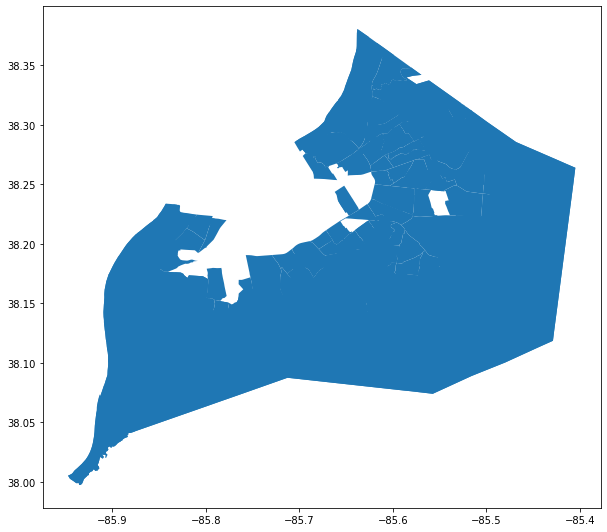

In [87]:
# Reviewing the plots
gdf.plot(figsize=(10,10))

<AxesSubplot:>

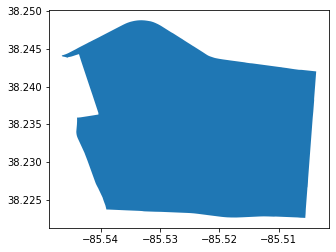

In [88]:
# Plotting a random census tract
gdf.sample().plot()

### Reviewing the data types within the file

In [89]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             115 non-null    object  
 1   name              115 non-null    object  
 2   B03002001         115 non-null    float64 
 3   B03002001, Error  115 non-null    float64 
 4   B03002002         115 non-null    float64 
 5   B03002002, Error  115 non-null    float64 
 6   B03002003         115 non-null    float64 
 7   B03002003, Error  115 non-null    float64 
 8   B03002004         115 non-null    float64 
 9   B03002004, Error  115 non-null    float64 
 10  B03002005         115 non-null    float64 
 11  B03002005, Error  115 non-null    float64 
 12  B03002006         115 non-null    float64 
 13  B03002006, Error  115 non-null    float64 
 14  B03002007         115 non-null    float64 
 15  B03002007, Error  115 non-null    float64 
 16  B03002008         

In [90]:
# Looking at the geo_id
gdf.geoid.head()

0    14000US21111004500
1    14000US21111007501
2    14000US21111007502
3    14000US21111007700
4    14000US21111009103
Name: geoid, dtype: object

### GEO.ID Interpretation
<ul>
    <li>14000 = Summary Level of Data</li>
    <li>US = Country</li>
    <li>21 = State</li>
    <li>111 = County</li>
    <li>004500 = Census Tract</li>
</ul>

### Data Cleaning
<ul>
    <li>Removing unnecessary columns</li>
    <li>Removing unnecessary rows</li>
    <li>Renaming Columns</li>
    <li>Normalizing the data (Converting Counts to Percentages)</li>
</ul>


In [91]:
list(gdf)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [92]:
# Ignoring Error columns and selecting Non-Hispanic with Race Categories and Hispanic Category
columns_to_keep = [
    'geoid'
    ,'name'
    , 'B03002001'
    , 'B03002002'
    , 'B03002003'
    , 'B03002004'
    , 'B03002005'
    , 'B03002006'
    , 'B03002007'
    , 'B03002008'
    , 'B03002009'
    , 'B03002012'
    , 'geometry'
]

In [93]:
# redefine dataframe keeping only columns of interest
gdf = gdf[columns_to_keep]

In [94]:
gdf.head()

geoid                               name  B03002001  \
0  14000US21111004500     Census Tract 45, Jefferson, KY     3295.0   
1  14000US21111007501  Census Tract 75.01, Jefferson, KY     5500.0   
2  14000US21111007502  Census Tract 75.02, Jefferson, KY     5663.0   
3  14000US21111007700     Census Tract 77, Jefferson, KY     3429.0   
4  14000US21111009103  Census Tract 91.03, Jefferson, KY     1563.0   

   B03002002  B03002003  B03002004  B03002005  B03002006  B03002007  \
0     3061.0     2012.0      948.0        0.0       18.0        0.0   
1     5457.0     5151.0       27.0        0.0      191.0        0.0   
2     5546.0     5096.0      358.0        0.0       78.0        0.0   
3     3312.0     2941.0      212.0        0.0      128.0        0.0   
4     1386.0      886.0      197.0       25.0      262.0        0.0   

   B03002008  B03002009  B03002012  \
0       21.0       62.0      234.0   
1       23.0       65.0       43.0   
2        0.0       14.0      117.0   
3        0.0       31.0      117.0   
4        0.0       16.0      177.0   

                                            geometry  
0  MULTIPOLYGON (((-85.80194 38.15540, -85.80164 ...  
1  MULTIPOLYGON (((-85.70476 38.28551, -85.70415 ...  
2  MULTIPOLYGON (((-85.67605 38.30039, -85.67593 ...  
3  MULTIPOLYGON (((-85.69603 38.27383, -85.69552 ...  
4  MULTIPOLYGON (((-85.76555 38.15263, -85.76551 ...

### Dropping county total population row

In [95]:
# Check last row to make sure it's the county total, this is not needed when plotting
gdf.tail()

geoid                                               name  \
110  14000US21111012703                 Census Tract 127.03, Jefferson, KY   
111  14000US21111012801                 Census Tract 128.01, Jefferson, KY   
112  14000US21111012802                 Census Tract 128.02, Jefferson, KY   
113  14000US21111980100                   Census Tract 9801, Jefferson, KY   
114      16000US2148006  Louisville/Jefferson County metro government (...   

     B03002001  B03002002  B03002003  B03002004  B03002005  B03002006  \
110     6439.0     6047.0     4564.0     1169.0       22.0        0.0   
111     2934.0     2836.0      347.0     2383.0        0.0        6.0   
112     2419.0     2158.0      542.0     1489.0        0.0        9.0   
113        0.0        0.0        0.0        0.0        0.0        0.0   
114   617790.0   583052.0   405145.0   144069.0      781.0    16406.0   

     B03002007  B03002008  B03002009  B03002012  \
110        0.0       40.0      252.0      392.0   
111        0.0        0.0      100.0       98.0   
112        0.0        0.0      118.0      261.0   
113        0.0        0.0        0.0        0.0   
114      334.0     1646.0    14671.0    34738.0   

                                              geometry  
110  MULTIPOLYGON (((-85.90924 38.14348, -85.90913 ...  
111  MULTIPOLYGON (((-85.82054 38.21298, -85.81943 ...  
112  MULTIPOLYGON (((-85.80782 38.19239, -85.80757 ...  
113  MULTIPOLYGON (((-85.75715 38.19033, -85.75705 ...  
114  MULTIPOLYGON (((-85.49777 38.24383, -85.49736 ...

In [96]:
# Dropping last row (114) as it is not needed and will skew results if kept
gdf = gdf.drop([114])

#Checking after dropping last row
gdf.tail()

geoid                                name  B03002001  \
109  14000US21111012702  Census Tract 127.02, Jefferson, KY     1965.0   
110  14000US21111012703  Census Tract 127.03, Jefferson, KY     6439.0   
111  14000US21111012801  Census Tract 128.01, Jefferson, KY     2934.0   
112  14000US21111012802  Census Tract 128.02, Jefferson, KY     2419.0   
113  14000US21111980100    Census Tract 9801, Jefferson, KY        0.0   

     B03002002  B03002003  B03002004  B03002005  B03002006  B03002007  \
109     1839.0     1444.0      321.0        0.0        0.0        0.0   
110     6047.0     4564.0     1169.0       22.0        0.0        0.0   
111     2836.0      347.0     2383.0        0.0        6.0        0.0   
112     2158.0      542.0     1489.0        0.0        9.0        0.0   
113        0.0        0.0        0.0        0.0        0.0        0.0   

     B03002008  B03002009  B03002012  \
109        0.0       74.0      126.0   
110       40.0      252.0      392.0   
111        0.0      100.0       98.0   
112        0.0      118.0      261.0   
113        0.0        0.0        0.0   

                                              geometry  
109  MULTIPOLYGON (((-85.89354 38.18901, -85.89267 ...  
110  MULTIPOLYGON (((-85.90924 38.14348, -85.90913 ...  
111  MULTIPOLYGON (((-85.82054 38.21298, -85.81943 ...  
112  MULTIPOLYGON (((-85.80782 38.19239, -85.80757 ...  
113  MULTIPOLYGON (((-85.75715 38.19033, -85.75705 ...

### Renaming Columns

In [97]:
gdf.columns = ["geoid"
    , "name"
    , "Total"
    , "Non-Hispanic"
    , "White"
    , "Black"
    , "AI/AN"
    , "Asian"
    , "HI/PI"
    , "Other"
    , "2+ Races"
    , "Hispanic"
    , "geometry"
]

In [98]:
gdf.head()

geoid                               name   Total  \
0  14000US21111004500     Census Tract 45, Jefferson, KY  3295.0   
1  14000US21111007501  Census Tract 75.01, Jefferson, KY  5500.0   
2  14000US21111007502  Census Tract 75.02, Jefferson, KY  5663.0   
3  14000US21111007700     Census Tract 77, Jefferson, KY  3429.0   
4  14000US21111009103  Census Tract 91.03, Jefferson, KY  1563.0   

   Non-Hispanic   White  Black  AI/AN  Asian  HI/PI  Other  2+ Races  \
0        3061.0  2012.0  948.0    0.0   18.0    0.0   21.0      62.0   
1        5457.0  5151.0   27.0    0.0  191.0    0.0   23.0      65.0   
2        5546.0  5096.0  358.0    0.0   78.0    0.0    0.0      14.0   
3        3312.0  2941.0  212.0    0.0  128.0    0.0    0.0      31.0   
4        1386.0   886.0  197.0   25.0  262.0    0.0    0.0      16.0   

   Hispanic                                           geometry  
0     234.0  MULTIPOLYGON (((-85.80194 38.15540, -85.80164 ...  
1      43.0  MULTIPOLYGON (((-85.70476 38.28551, -85.70415 ...  
2     117.0  MULTIPOLYGON (((-85.67605 38.30039, -85.67593 ...  
3     117.0  MULTIPOLYGON (((-85.69603 38.27383, -85.69552 ...  
4     177.0  MULTIPOLYGON (((-85.76555 38.15263, -85.76551 ...

In [99]:
# Double checking math and totals
# Checking a random census tract
random_tract = gdf.sample()
random_tract

geoid                               name   Total  \
5  14000US21111009105  Census Tract 91.05, Jefferson, KY  2383.0   

   Non-Hispanic   White  Black  AI/AN  Asian  HI/PI  Other  2+ Races  \
5        2102.0  1759.0   88.0    0.0  141.0    0.0    5.0     109.0   

   Hispanic                                           geometry  
5     281.0  MULTIPOLYGON (((-85.76989 38.12573, -85.76947 ...

In [100]:
print(f"Total Population: {random_tract.iloc[0]['Total']}")

print(f"""Adding Each Race Pop Total: 
{random_tract.iloc[0]['White'] 
+ random_tract.iloc[0]['Black'] 
+ random_tract.iloc[0]['AI/AN']
+ random_tract.iloc[0]['Asian']
+ random_tract.iloc[0]['HI/PI']
+ random_tract.iloc[0]['Other']
+ random_tract.iloc[0]['2+ Races']
+ random_tract.iloc[0]['Hispanic']
}
""")

# Checking Non-Hispanic + Hispanic Totals
print(f"""
Non-Hispanic: {random_tract.iloc[0]['Non-Hispanic']}
Hispanic: {random_tract.iloc[0]['Hispanic']}
Adding Both: {random_tract.iloc[0]['Non-Hispanic'] + random_tract.iloc[0]['Hispanic']}
Total from Column: {random_tract.iloc[0]['Total']}
""")

Total Population: 2383.0
Adding Each Race Pop Total: 
2383.0


Non-Hispanic: 2102.0
Hispanic: 281.0
Adding Both: 2383.0
Total from Column: 2383.0



In [101]:
# Descriptive Stats
print(f"The median population size is: {gdf['Total'].median()}")
print(gdf['Total'].describe())

The median population size is: 4734.5
count     114.000000
mean     4638.412281
std      1663.999621
min         0.000000
25%      3450.500000
50%      4734.500000
75%      5680.250000
max      8307.000000
Name: Total, dtype: float64


<AxesSubplot:title={'center':'Louisville, Jefferson County Census Tract by Population Size, ACS 2019 5-year'}, ylabel='Frequency'>

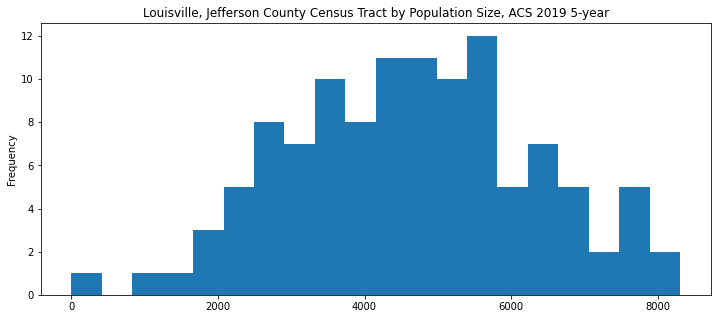

In [102]:
gdf['Total'].plot.hist(figsize=(12,5),
                       bins=20,
                       title='Louisville, Jefferson County Census Tract by Population Size, ACS 2019 5-year'
                      )

In [103]:
# Top 10 most populated census tract in Louisville, KY?
gdf_sorted = gdf.sort_values(by='Total', ascending=False)

In [104]:
gdf_sorted[['geoid', 'Total']].head(10)

geoid   Total
92   14000US21111012106  8307.0
52   14000US21111011302  8138.0
18   14000US21111010311  7854.0
69   14000US21111011601  7837.0
83   14000US21111011905  7621.0
57   14000US21111011505  7602.0
16   14000US21111010307  7483.0
43   14000US21111011106  7386.0
42   14000US21111011102  7081.0
106  14000US21111012601  7022.0

<AxesSubplot:>

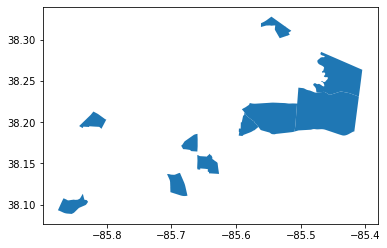

In [105]:
# Plotting the top 10 most populated census tracts
gdf_sorted.head(10).plot()

Text(0.5, 1.0, 'Louisville, Ky Population Count by Census Tract, ACS 2019 5-year')

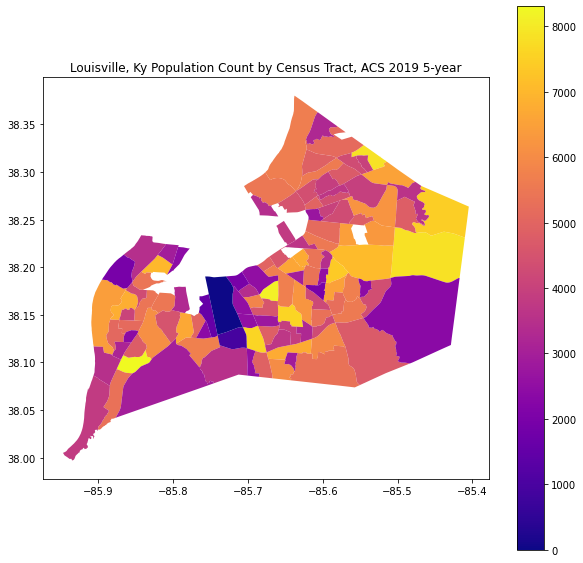

In [106]:
# Reviewing all census tracts and their population size density
gdf_sorted.plot(figsize=(10,10),
               column='Total',
               cmap='plasma',
               legend=True,
               )

plt.title("Louisville, Ky Population Count by Census Tract, ACS 2019 5-year")

In [107]:
# Census tracts with no people

gdf_no_pop = gdf[gdf['Total']==0]
print('Total number of census tracts with no people: ' + str(len(gdf_no_pop)))

Total number of census tracts with no people: 1


In [108]:
# Normalizing the data by converting them to percentages
list(gdf)

['geoid',
 'name',
 'Total',
 'Non-Hispanic',
 'White',
 'Black',
 'AI/AN',
 'Asian',
 'HI/PI',
 'Other',
 '2+ Races',
 'Hispanic',
 'geometry']

In [109]:
# Create and calculate a percentage column for each race
# Creating a for loop by identify all race count columns and calculating the percentage for each column selected
for race_eth in gdf.columns[4:12]:
    gdf[f'Percent {race_eth}'] = gdf[race_eth]/gdf['Total']*100

gdf.head()

geoid                               name   Total  \
0  14000US21111004500     Census Tract 45, Jefferson, KY  3295.0   
1  14000US21111007501  Census Tract 75.01, Jefferson, KY  5500.0   
2  14000US21111007502  Census Tract 75.02, Jefferson, KY  5663.0   
3  14000US21111007700     Census Tract 77, Jefferson, KY  3429.0   
4  14000US21111009103  Census Tract 91.03, Jefferson, KY  1563.0   

   Non-Hispanic   White  Black  AI/AN  Asian  HI/PI  Other  ...  Hispanic  \
0        3061.0  2012.0  948.0    0.0   18.0    0.0   21.0  ...     234.0   
1        5457.0  5151.0   27.0    0.0  191.0    0.0   23.0  ...      43.0   
2        5546.0  5096.0  358.0    0.0   78.0    0.0    0.0  ...     117.0   
3        3312.0  2941.0  212.0    0.0  128.0    0.0    0.0  ...     117.0   
4        1386.0   886.0  197.0   25.0  262.0    0.0    0.0  ...     177.0   

                                            geometry Percent White  \
0  MULTIPOLYGON (((-85.80194 38.15540, -85.80164 ...     61.062215   
1  MULTIPOLYGON (((-85.70476 38.28551, -85.70415 ...     93.654545   
2  MULTIPOLYGON (((-85.67605 38.30039, -85.67593 ...     89.987639   
3  MULTIPOLYGON (((-85.69603 38.27383, -85.69552 ...     85.768446   
4  MULTIPOLYGON (((-85.76555 38.15263, -85.76551 ...     56.685861   

   Percent Black  Percent AI/AN  Percent Asian  Percent HI/PI  Percent Other  \
0      28.770865       0.000000       0.546282            0.0       0.637329   
1       0.490909       0.000000       3.472727            0.0       0.418182   
2       6.321738       0.000000       1.377362            0.0       0.000000   
3       6.182561       0.000000       3.732867            0.0       0.000000   
4      12.603967       1.599488      16.762636            0.0       0.000000   

   Percent 2+ Races  Percent Hispanic  
0          1.881639          7.101669  
1          1.181818          0.781818  
2          0.247219          2.066043  
3          0.904054          3.412073  
4          1.023672         11.324376  

[5 rows x 21 columns]

In [110]:
list(gdf)

['geoid',
 'name',
 'Total',
 'Non-Hispanic',
 'White',
 'Black',
 'AI/AN',
 'Asian',
 'HI/PI',
 'Other',
 '2+ Races',
 'Hispanic',
 'geometry',
 'Percent White',
 'Percent Black',
 'Percent AI/AN',
 'Percent Asian',
 'Percent HI/PI',
 'Percent Other',
 'Percent 2+ Races',
 'Percent Hispanic']

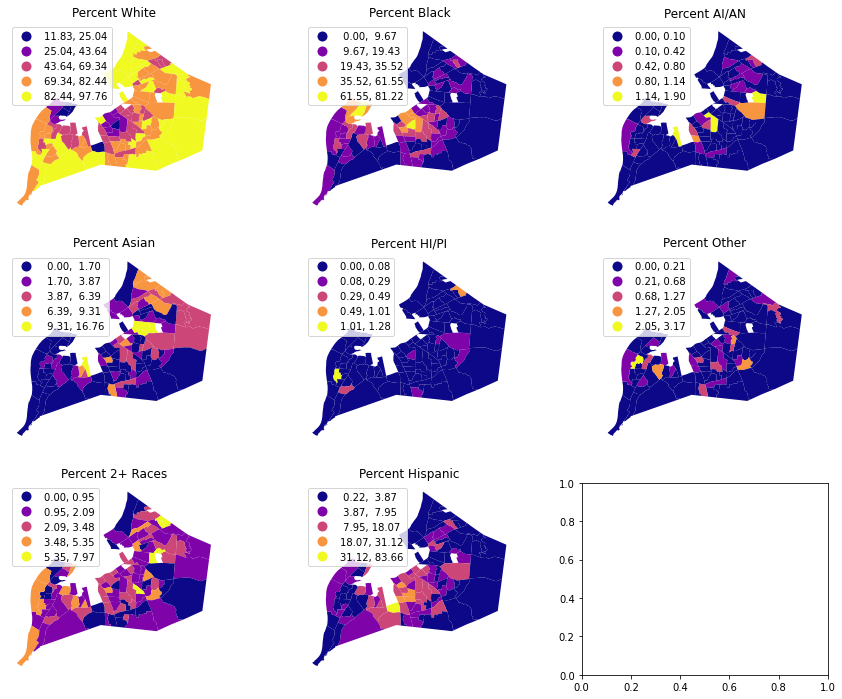

In [111]:
# Looking at population size by census tract and race/ethnicity
# Automating the creation of subplots
# Defining figure and number of subplots by row and column
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(15,12))

# Defining an iterator variable and an axes list to help cycle through each race category
i=0
ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

# For loop iterates through each race percent category and plots a subplot for each as well
for race_pct in gdf.columns[13:21]:
    gdf.plot(column=race_pct,
        cmap='plasma',
        scheme='NaturalBreaks',
        ax=ax_list[i],
        legend=True,
        legend_kwds={'loc': 'upper left'})
    ax_list[i].axis("off")
    ax_list[i].set_title(race_pct)
    i = i + 1

### Reviewing Ethnicity Clusters in Louisville, KY

<AxesSubplot:>

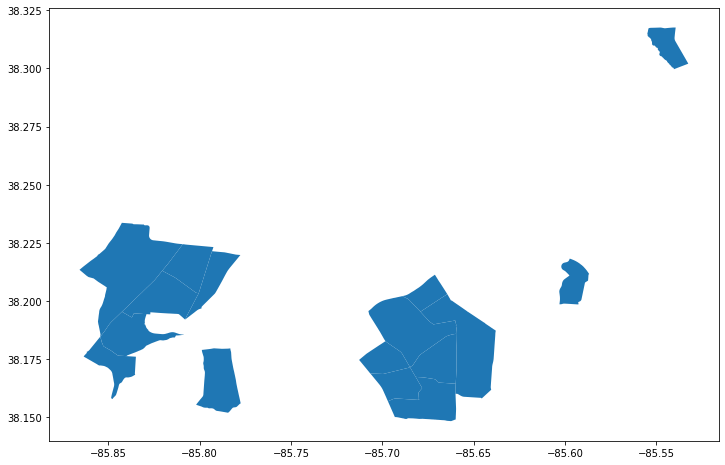

In [112]:
gdf[gdf['Percent Black'] > 25].plot(figsize=(12,10))

<AxesSubplot:>

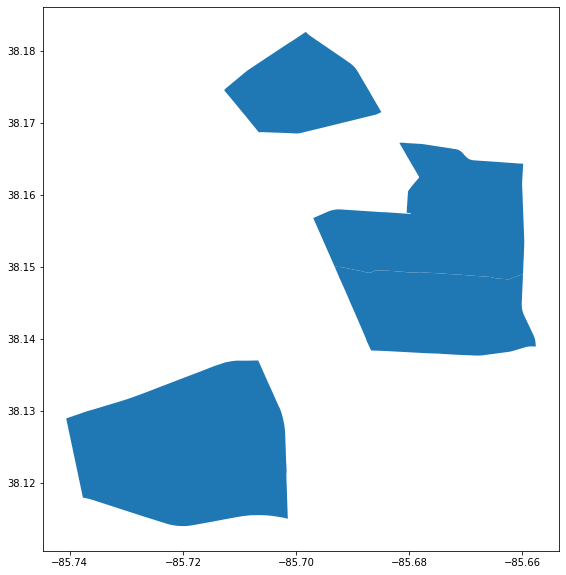

In [113]:
gdf[gdf['Percent Hispanic'] > 25].plot(figsize=(12,10))

<AxesSubplot:>

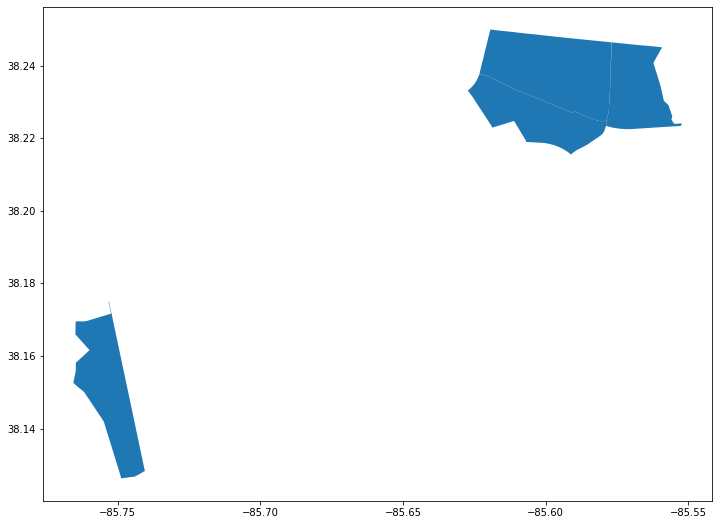

In [114]:
gdf[gdf['Percent Asian'] > 10].plot(figsize=(12,10))

<AxesSubplot:>

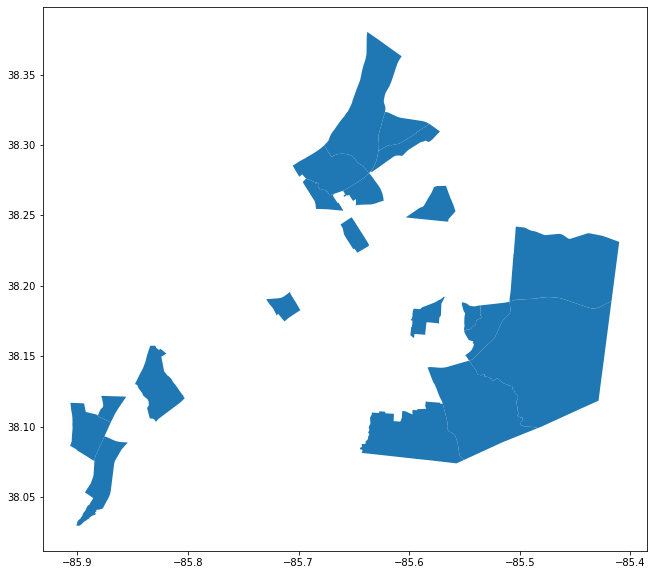

In [123]:
gdf[gdf['Percent White'] > 85].plot(figsize=(12,10))

### Adding a basemap to plots

In [115]:
# Reprojecting to Web Mercator in order to use basemap
gdf_web_mercator = gdf.to_crs(epsg=3857)
gdf_web_mercator.head()

geoid                               name   Total  \
0  14000US21111004500     Census Tract 45, Jefferson, KY  3295.0   
1  14000US21111007501  Census Tract 75.01, Jefferson, KY  5500.0   
2  14000US21111007502  Census Tract 75.02, Jefferson, KY  5663.0   
3  14000US21111007700     Census Tract 77, Jefferson, KY  3429.0   
4  14000US21111009103  Census Tract 91.03, Jefferson, KY  1563.0   

   Non-Hispanic   White  Black  AI/AN  Asian  HI/PI  Other  ...  Hispanic  \
0        3061.0  2012.0  948.0    0.0   18.0    0.0   21.0  ...     234.0   
1        5457.0  5151.0   27.0    0.0  191.0    0.0   23.0  ...      43.0   
2        5546.0  5096.0  358.0    0.0   78.0    0.0    0.0  ...     117.0   
3        3312.0  2941.0  212.0    0.0  128.0    0.0    0.0  ...     117.0   
4        1386.0   886.0  197.0   25.0  262.0    0.0    0.0  ...     177.0   

                                            geometry Percent White  \
0  MULTIPOLYGON (((-9551428.604 4601401.799, -955...     61.062215   
1  MULTIPOLYGON (((-9540610.353 4619837.118, -954...     93.654545   
2  MULTIPOLYGON (((-9537413.703 4621948.188, -953...     89.987639   
3  MULTIPOLYGON (((-9539638.200 4618181.924, -953...     85.768446   
4  MULTIPOLYGON (((-9547377.799 4601009.383, -954...     56.685861   

   Percent Black  Percent AI/AN  Percent Asian  Percent HI/PI  Percent Other  \
0      28.770865       0.000000       0.546282            0.0       0.637329   
1       0.490909       0.000000       3.472727            0.0       0.418182   
2       6.321738       0.000000       1.377362            0.0       0.000000   
3       6.182561       0.000000       3.732867            0.0       0.000000   
4      12.603967       1.599488      16.762636            0.0       0.000000   

   Percent 2+ Races  Percent Hispanic  
0          1.881639          7.101669  
1          1.181818          0.781818  
2          0.247219          2.066043  
3          0.904054          3.412073  
4          1.023672         11.324376  

[5 rows x 21 columns]

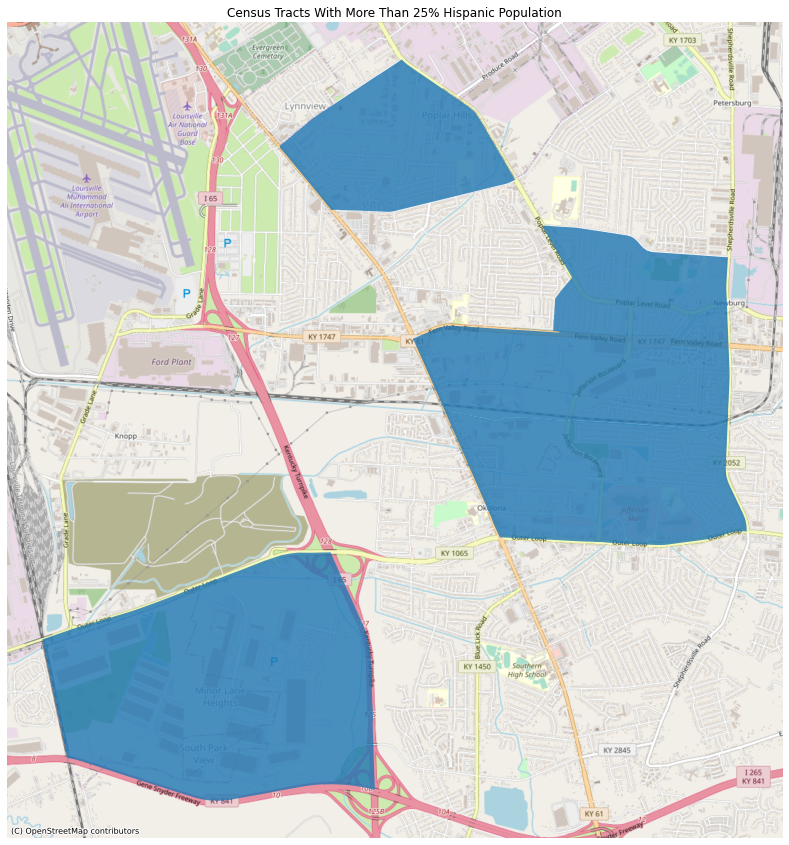

In [116]:
fig, ax = plt.subplots(figsize=(15,15))

gdf_web_mercator[gdf_web_mercator['Percent Hispanic'] > 25].plot(ax=ax, alpha=0.8)

ax.set_title("Census Tracts With More Than 25% Hispanic Population")

ax.axis('off')

# adding basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

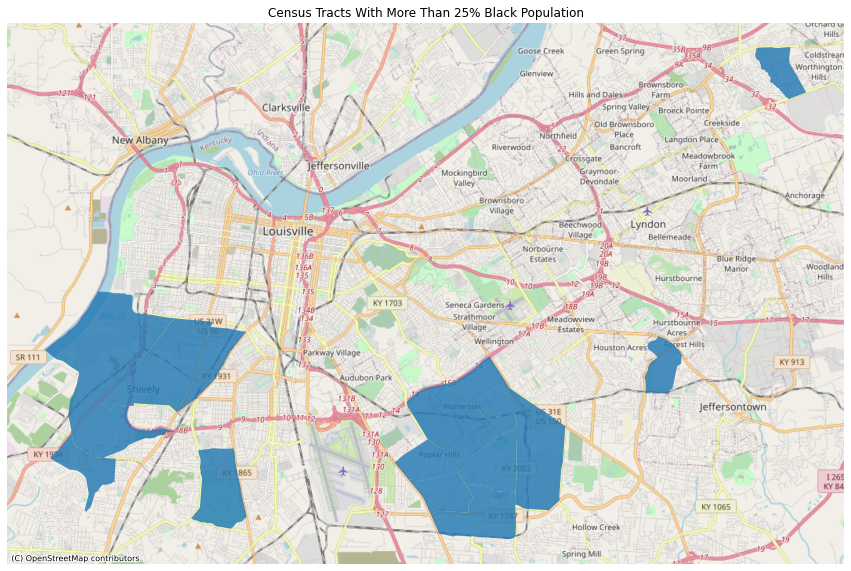

In [117]:
fig, ax = plt.subplots(figsize=(15,15))

gdf_web_mercator[gdf_web_mercator['Percent Black'] > 25].plot(ax=ax, alpha=0.8)

ax.set_title("Census Tracts With More Than 25% Black Population")

ax.axis('off')

# adding basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

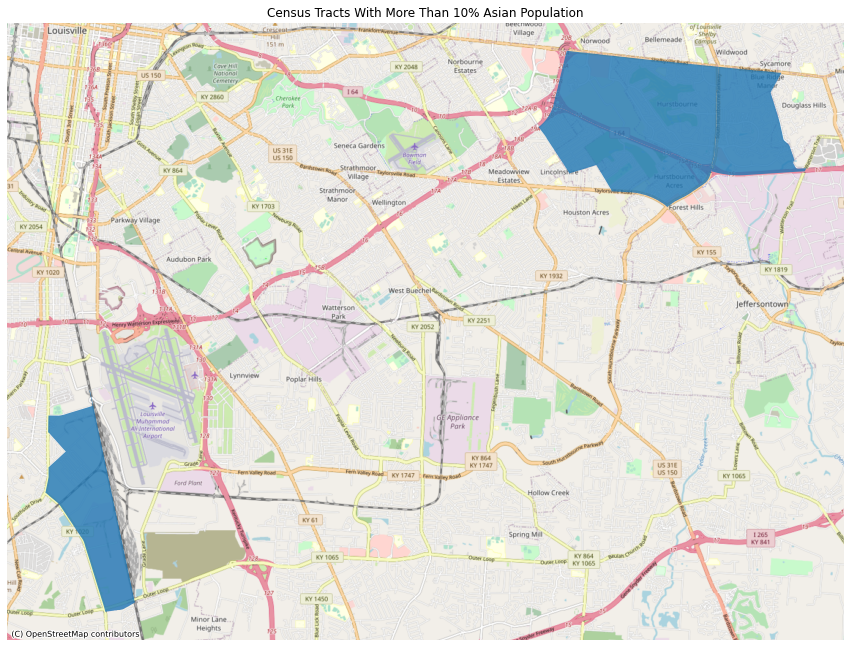

In [118]:
fig, ax = plt.subplots(figsize=(15,15))

gdf_web_mercator[gdf_web_mercator['Percent Asian'] > 10].plot(ax=ax, alpha=0.8)

ax.set_title("Census Tracts With More Than 10% Asian Population")

ax.axis('off')

# adding basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

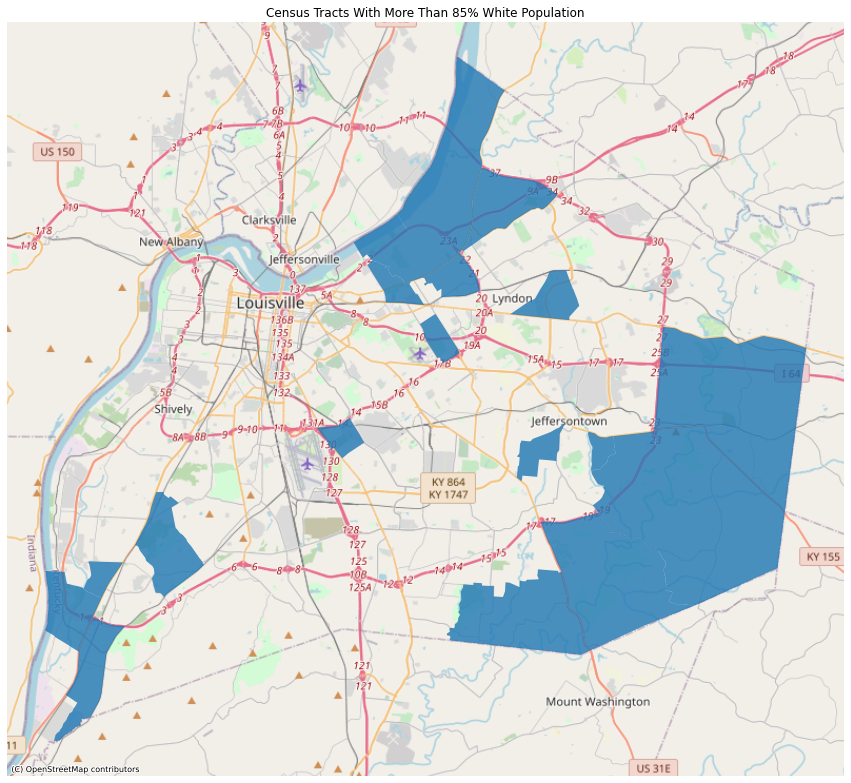

In [124]:
fig, ax = plt.subplots(figsize=(15,15))

gdf_web_mercator[gdf_web_mercator['Percent White'] > 85].plot(ax=ax, alpha=0.8)

ax.set_title("Census Tracts With More Than 85% White Population")

ax.axis('off')

# adding basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)